# Bidirectional approach

In [1]:
#import libraries
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [44]:
path_to_file = "articles/20_things_5_ways_combine.txt" #Enter article name here

In [45]:
tokenizer = Tokenizer()

In [46]:
text = open(path_to_file,'rb').read().decode(encoding='utf-8')
print(f'The length of the article is {len(text)}')

The length of the article is 6814


In [47]:
data = text.lower().replace('\xa0\xa0','')

In [48]:
data = text.lower().replace('\xa0','')
data = data.split(".")
#data

In [49]:
tokenizer.fit_on_texts(data)
total_words = len(tokenizer.word_index) + 1

#print(tokenizer.word_index)
#print(total_words)

In [50]:
print(total_words)

464


In [51]:
input_sequences = []
for line in data:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        #print(i)
        n_gram_sequence = token_list[:i+1]
        #print("N_gram: "+ n_gram_sequence)
        input_sequences.append(n_gram_sequence)
#print(input_sequences)
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [52]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.988):
            print("\nReached acceptable loss!")
            self.model.stop_training = True

In [56]:
callback = myCallback()
model = Sequential()
model.add(Embedding(total_words, 128, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(40)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=1000, verbose=1,callbacks=[callback])

Epoch 1/1000
32/32 [==============================] - 0s 11ms/step - loss: 6.1026 - accuracy: 0.0236
Epoch 2/1000
32/32 [==============================] - 0s 9ms/step - loss: 5.7703 - accuracy: 0.0256
Epoch 3/1000
32/32 [==============================] - 0s 9ms/step - loss: 5.6519 - accuracy: 0.0383
Epoch 4/1000
32/32 [==============================] - 0s 9ms/step - loss: 5.6069 - accuracy: 0.0383
Epoch 5/1000
32/32 [==============================] - 0s 9ms/step - loss: 5.5662 - accuracy: 0.0383
Epoch 6/1000
32/32 [==============================] - 0s 9ms/step - loss: 5.5071 - accuracy: 0.0482
Epoch 7/1000
32/32 [==============================] - 0s 9ms/step - loss: 5.4282 - accuracy: 0.0482
Epoch 8/1000
32/32 [==============================] - 0s 9ms/step - loss: 5.3384 - accuracy: 0.0501
Epoch 9/1000
32/32 [==============================] - 0s 9ms/step - loss: 5.2415 - accuracy: 0.0521
Epoch 10/1000
32/32 [==============================] - 0s 9ms/step - loss: 5.1388 - accuracy: 0.056

In [57]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

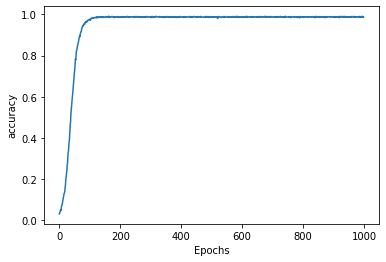

In [33]:
plot_graphs(history, 'accuracy')

In [61]:
#seed_text = "Using data science to optimize your budget"
#seed_text = "rich customer experience has always been an important factor"
seed_text = "Predict and optimise conversions using data science by"
next_words = 10

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list],maxlen=max_sequence_len-1,padding='pre')
    predicted = model.predict_classes(token_list,verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Predict and optimise conversions using data science by you can be targeted tricky and time consuming the performance
